In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv('./data/kickstarter.csv')
data.shape

(1163, 20)

## Prepare Data
* Perform EDA
* Handle Missing Data (Remove or Impute)
* Identify Target Data
* Scale the Data
* Encode any Text Data (Categorical Data)

In [3]:
data.head()

,Funded,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,no,https://www.kickstarter.com/projects/mischaa/p...,Pixelstart: Choose Your Own Pixels (Canceled),2016,Apr,Art,1,11,2,125,57,2829.59,53,7,1.14,171.0,2001,2,1,1
1,no,https://www.kickstarter.com/projects/105587445...,Smart shop Icons (Canceled),2016,Apr,Art,1,0,0,111,27,28295.87,51,3,1.14,46.0,2508,0,0,0
2,no,https://www.kickstarter.com/projects/minimalpr...,Minimal Haus Prints: Digital Prints for DIY Wa...,2016,Apr,Art,0,4,0,294,52,766.25,30,8,1.51,755.0,2325,1,1,1
3,no,https://www.kickstarter.com/projects/797661619...,NeoN: Altering the Alternative (Canceled),2016,Mar,Art,0,0,0,179,41,1439.10,24,5,7.00,141.0,3736,13,1,1
4,no,https://www.kickstarter.com/projects/198369359...,Nintendo NES 8bit retro canvas (Canceled),2016,Mar,Art,0,0,0,51,41,1000.00,30,2,5.00,20.0,636,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Funded             1163 non-null   object 
 1   URL                1163 non-null   object 
 2   Title              1163 non-null   object 
 3   Year               1163 non-null   int64  
 4   Month              1163 non-null   object 
 5   Type               1163 non-null   object 
 6   Has FB             1163 non-null   int64  
 7   Backed Projects    1163 non-null   int64  
 8   Previous Projects  1163 non-null   int64  
 9   Creator Desc Len   1163 non-null   int64  
 10  Title Len          1163 non-null   int64  
 11  Goal               1163 non-null   float64
 12  Duration           1163 non-null   int64  
 13  Pledge Levels      1163 non-null   int64  
 14  Min Pledge Tiers   1163 non-null   float64
 15  Max Pledge Tiers   1163 non-null   float64
 16  Proj Desc Len      1163 

In [5]:
data.isnull().sum()

Funded               0
URL                  0
Title                0
Year                 0
Month                0
Type                 0
Has FB               0
Backed Projects      0
Previous Projects    0
Creator Desc Len     0
Title Len            0
Goal                 0
Duration             0
Pledge Levels        0
Min Pledge Tiers     0
Max Pledge Tiers     0
Proj Desc Len        0
Images               0
Videos               0
Has Video            0
dtype: int64

In [6]:
data['Funded'].value_counts()

Funded
no     685
yes    478
Name: count, dtype: int64

In [7]:
data.columns

Index(['Funded', 'URL', 'Title', 'Year', 'Month', 'Type', 'Has FB',
       'Backed Projects', 'Previous Projects', 'Creator Desc Len', 'Title Len',
       'Goal', 'Duration', 'Pledge Levels', 'Min Pledge Tiers',
       'Max Pledge Tiers', 'Proj Desc Len', 'Images', 'Videos', 'Has Video'],
      dtype='object')

In [8]:
# PERFORM ANY RENAMES...       we rename by copying columns and saving them back
#df.columns = [' ',....]

In [9]:
#ProfileReport(data, title ='Kickstarter')

### Create a classifier:
* Using the kickstarter.csv file for train and test
* Using the unseen_data.csv below for a final test
* 'Funded' is the feature I will predict 
### Classifier Steps
1) Gather sample data for "unseen data"
    * a. create a train / test csv file
    * b. create a unseen data csv file
2) Pycaret EDA notebook 
    * a. identify the best (sklearn) model 
       * i. using the train / test csv from step 1
    * b. EDA
3) Lean Pycaret notebook:
    * create the model
    * export the pipline (i.e. finalize model)
4) Import using joblib
    * run against unseen data
    * test results

#### **1.**  First I set aside 20% of data sample to be used in the end against the trined and tested data and i save them each in .csv file

In [10]:
unseen_data = data.sample(frac=.20)   # set asides data.sample(frac=.30, random_state=42) , i decided for 20% 
df = data.drop(unseen_data.index)

In [11]:
# does my row count match
data.shape[0] == df.shape[0] + unseen_data.shape[0]

True

In [12]:
#unseen_data.to_csv('./data/unseen_data.csv')
#reset the index
unseen_data.to_csv('./data/unseen_data.csv', index=False)

In [13]:
#df.to_csv('./data/adult_census.csv')
#reset index
df.to_csv('./data/Kickstarter0.8.csv', index=False)

In [14]:
df.describe().T   

,count,mean,std,min,25%,50%,75%,max
Year,930.0,2016.000000,0.000000,2016.00,2016.0000,2016.0,2016.00,2016.0
Has FB,930.0,0.512903,0.500102,0.00,0.0000,1.0,1.00,1.0
Backed Projects,930.0,4.351613,16.866347,0.00,0.0000,0.0,2.00,348.0
Previous Projects,930.0,0.798925,2.530630,0.00,0.0000,0.0,0.00,29.0
Creator Desc Len,930.0,361.596774,167.218767,0.00,224.2500,397.0,503.75,757.0
Title Len,930.0,36.998925,17.786468,1.00,21.0000,38.0,53.00,80.0
Goal,930.0,42977.266258,347614.496821,10.00,1697.7500,7000.0,25000.00,10000000.0
Duration,930.0,33.656989,11.537162,4.00,30.0000,30.0,35.00,62.0
Pledge Levels,930.0,7.194624,5.983092,1.00,3.0000,6.0,10.00,89.0
Min Pledge Tiers,930.0,34.254409,341.074449,0.70,1.2025,5.0,14.00,10000.0


In [15]:
df.columns

Index(['Funded', 'URL', 'Title', 'Year', 'Month', 'Type', 'Has FB',
       'Backed Projects', 'Previous Projects', 'Creator Desc Len', 'Title Len',
       'Goal', 'Duration', 'Pledge Levels', 'Min Pledge Tiers',
       'Max Pledge Tiers', 'Proj Desc Len', 'Images', 'Videos', 'Has Video'],
      dtype='object')

#### **2.** Second, we import Classification Experiment and/or classification models and set up the Target + select best model

In [16]:
#pip install --upgrade joblib
# !pip install joblib==1.3.0

In [17]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()

In [18]:
s.setup(data, target = 'Funded', session_id = 42)       #quickstart has 123, we do 42

,Description,Value
0,Session id,42
1,Target,Funded
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(1163, 20)"
5,Transformed data shape,"(1163, 29)"
6,Transformed train set shape,"(814, 29)"
7,Transformed test set shape,"(349, 29)"
8,Numeric features,15
9,Categorical features,4


In [19]:
%%time
best = s.compare_models()  

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7801,0.0000,0.7801,0.7794,0.7776,0.5381,0.5413,0.6930
ridge,Ridge Classifier,0.7298,0.0000,0.7298,0.7879,0.6953,0.3882,0.4654,0.0170
svm,SVM - Linear Kernel,0.6671,0.0000,0.6671,0.7161,0.6591,0.3409,0.3741,0.0170
knn,K Neighbors Classifier,0.6525,0.0000,0.6525,0.6498,0.6477,0.2709,0.2739,0.3710
et,Extra Trees Classifier,0.5897,0.0000,0.5897,0.4291,0.4409,0.0045,0.0172,0.0370
dt,Decision Tree Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0170
rf,Random Forest Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0400
qda,Quadratic Discriminant Analysis,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0220
ada,Ada Boost Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0180
gbc,Gradient Boosting Classifier,0.5885,0.0000,0.5885,0.3463,0.4360,0.0000,0.0000,0.0300


CPU times: total: 4.2 s
Wall time: 22.1 s


In [20]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [21]:
from pycaret.classification import setup, models, create_model, tune_model, finalize_model, save_model

cls = setup(data, target='Funded', session_id=42, fix_imbalance=True);

,Description,Value
0,Session id,42
1,Target,Funded
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(1163, 20)"
5,Transformed data shape,"(1307, 29)"
6,Transformed train set shape,"(958, 29)"
7,Transformed test set shape,"(349, 29)"
8,Numeric features,15
9,Categorical features,4


#### **3.** Third, we create, tune and finalize the model and export the .pkl file

In [22]:
lr = s.create_model('lr')
lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7805,0.0000,0.7805,0.7794,0.7780,0.5399,0.5427
1,0.8049,0.0000,0.8049,0.8045,0.8027,0.5910,0.5941
2,0.7927,0.0000,0.7927,0.7920,0.7922,0.5711,0.5713
3,0.7561,0.0000,0.7561,0.7543,0.7534,0.4888,0.4914
4,0.7284,0.0000,0.7284,0.7264,0.7269,0.4321,0.4327
5,0.7778,0.0000,0.7778,0.7763,0.7766,0.5354,0.5361
6,0.7901,0.0000,0.7901,0.7924,0.7848,0.5504,0.5601
7,0.8272,0.0000,0.8272,0.8263,0.8262,0.6386,0.6395
8,0.7654,0.0000,0.7654,0.7659,0.7595,0.4976,0.5063


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
tune_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8049,0.0000,0.8049,0.8111,0.8061,0.6048,0.6078
1,0.8049,0.0000,0.8049,0.8045,0.8027,0.5910,0.5941
2,0.7805,0.0000,0.7805,0.7868,0.7818,0.5554,0.5582
3,0.7439,0.0000,0.7439,0.7451,0.7444,0.4747,0.4748
4,0.7284,0.0000,0.7284,0.7315,0.7295,0.4428,0.4433
5,0.7407,0.0000,0.7407,0.7633,0.7429,0.4850,0.4973
6,0.7778,0.0000,0.7778,0.7805,0.7787,0.5441,0.5448
7,0.8272,0.0000,0.8272,0.8296,0.8279,0.6454,0.6462
8,0.8642,0.0000,0.8642,0.8729,0.8652,0.7253,0.7310


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
final_lr = finalize_model(tune_lr)
final_lr

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Year', 'Has FB',
                                             'Backed Projects',
                                             'Previous Projects',
                                             'Creator Desc Len', 'Title Len',
                                             'Goal', 'Duration',
                                             'Pledge Levels',
                                             'Min Pledge Tiers',
                                             'Max Pledge T...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 LogisticRegression(C=8.426, class_weight='balanced',
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=1000, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

We will save and use this  ***'final_lr'*** to predict the unseen data that will be imported below.

In [26]:
save_model(final_lr, './models/lr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Year', 'Has FB',
                                              'Backed Projects',
                                              'Previous Projects',
                                              'Creator Desc Len', 'Title Len',
                                              'Goal', 'Duration',
                                              'Pledge Levels',
                                              'Min Pledge Tiers',
                                              'Max Pledge T...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\

#### **4.** Forth, we run the test against *unseen_data* and report on predictions and scores

In [27]:
unseen = pd.read_csv('./data/unseen_data.csv')
unseen.tail(3)

,Funded,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
230,no,https://www.kickstarter.com/projects/169971452...,Letsjoin. (Canceled),2016,Feb,Apps,0,0,2,314,20,35000.00,57,7,1.0,1000.0,782,0,1,1
231,yes,https://www.kickstarter.com/projects/111724784...,Best to Say Nothing,2016,Mar,Video,0,0,0,334,19,503.68,20,4,7.0,43.0,2161,0,1,1
232,no,https://www.kickstarter.com/projects/776968104...,Smart APP Search Engine,2016,Mar,Apps,0,0,0,320,23,250000.00,30,1,35.0,35.0,3498,0,1,1


In [28]:
unseen.shape

(233, 20)

In [29]:
import joblib
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

test = pd.read_csv('./data/unseen_data.csv')
test.shape

(233, 20)

In [89]:
cls = joblib.load('./models/lr_model.pkl')

#### We use pickle file to set up the test against the *unseen* ###

In [90]:
### Set up the unseen_X and y ###
unseen_X = test.drop('Funded', axis=1)
y = test['Funded']

In [93]:
### Set up .predict() ###
y_pred = cls.predict(unseen_X)

In [94]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          no       0.86      0.81      0.83       136
         yes       0.75      0.81      0.78        97

    accuracy                           0.81       233
   macro avg       0.81      0.81      0.81       233
weighted avg       0.81      0.81      0.81       233



### To be able to encode the classification report we can import get_metrics() 

In [35]:
from pycaret.classification import *

In [36]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000001A737CB68E0>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method='pr...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000001A737CB6...,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000001A737CB6...,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


1. **Accuracy**: This is the ratio of the number of correct predictions to the total number of predictions. It's used when the classes are balanced. It is calculated as:
    $$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

2. **AUC (Area Under the ROC Curve)**: This metric is used in binary classification. It measures the ability of the classifier to distinguish between classes. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 suggests a poor classifier.

3. **Recall (Sensitivity or True Positive Rate)**: This is the ratio of the number of true positives divided by the sum of the true positives and the false negatives. It shows how many of the positive samples have been identified correctly. It is calculated as:
    $$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$$

4. **Precision (Positive Predictive Value)**: This is the ratio of the number of true positives divided by the sum of the true positives and the false positives. It shows how many of the positively classified samples are actually positive. It is calculated as:
    $$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$$

5. **F1 Score**: This is the harmonic mean of Precision and Recall and tries to balance the two. It is calculated as:
    $$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

6. **Kappa (Cohen's Kappa)**: This is used for multi-class classification. It measures the agreement between two raters who each classify items into mutually exclusive categories. A kappa of 1 indicates perfect agreement, while a kappa of 0 indicates agreement equivalent to chance.

7. **MCC (Matthews Correlation Coefficient)**: This is used in binary classification. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. It is calculated as:
    $$\text{MCC} = \frac{(\text{TP} \times \text{TN}) - (\text{FP} \times \text{FN})}{\sqrt{(\text{TP} + \text{FP})(\text{TP} + \text{FN})(\text{TN} + \text{FP})(\text{TN} + \text{FN})}}$$
    where TP is True Positive, TN is True Negative, FP is False Positive, and FN is False Negative.

These metrics provide a comprehensive view of the performance of a classification model. Different metrics are suitable for different scenarios and it's important to choose the right metric for the right task. For example, in a highly imbalanced dataset, accuracy might not be a good metric to use, and one might resort to using F1 Score, Precision, Recall, or AUC-ROC instead. Similarly, MCC is a good metric when the classes are of very different sizes.

### FINDINGS

In [37]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
cls = final_lr
unseen_X = unseen.drop('Funded', axis=1)
y_true = unseen['Funded']

In [39]:
y_pred = cls.predict(unseen_X)       # in the settings it does say it returns array

In [40]:
unseen_X.shape, y_pred.shape

((233, 19), (233,))

In [41]:
report = classification_report(y_true, y_pred)   #Shitf+Tab will show what it will show
print(report)

              precision    recall  f1-score   support

          no       0.86      0.81      0.83       136
         yes       0.75      0.81      0.78        97

    accuracy                           0.81       233
   macro avg       0.81      0.81      0.81       233
weighted avg       0.81      0.81      0.81       233



# SCORES

In [79]:
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, pos_label='yes')
rec = recall_score(y_true, y_pred, pos_label='yes')

In [80]:
print(f'Accuracy: {acc}\nPrecision: {prec}\nRecall: {rec}')

Accuracy: 0.8111587982832618
Precision: 0.7523809523809524
Recall: 0.8144329896907216


In [50]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[110,  26],
       [ 18,  79]], dtype=int64)

Text(0.5, 1.0, 'Unseen Dataset Confusion Matrix')

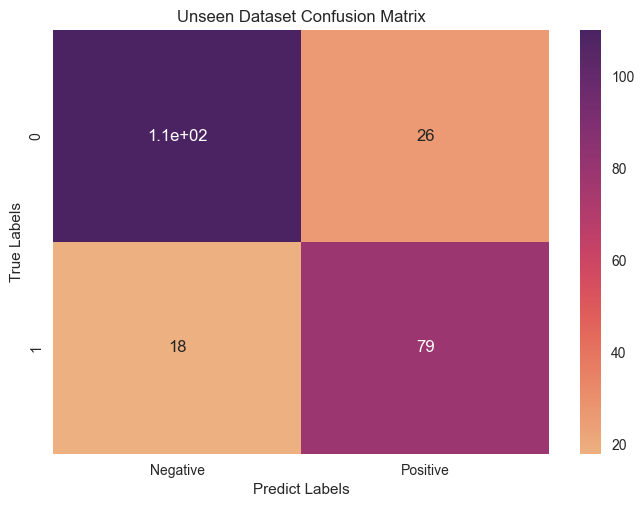

In [102]:
#import seaborn as sns
ax = sns.heatmap(cm, annot=True, cmap='flare')    #all this has to be in the same cell and we take control of my axis
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xticklabels(['Negative', 'Positive'])
plt.xlabel('Predict Labels')
plt.ylabel('True Labels')
plt.title('Unseen Dataset Confusion Matrix')

In [103]:
diff = df[df['Pred'] != df['True']]
diff['Pred'].value_counts()

Pred
yes    26
no     18
Name: count, dtype: int64

### BONUS 'TIP of a DAY'

#### ALWAYS STOP AND LOOK AT WHAT YOU GET: STRING, OBJECT ECT...

In [76]:
y_true.dtype, y_pred.dtype  , #(y_true[0])    #  Question: is pred_y dataframe or an object?!

(CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object),
 dtype('O'))

In [77]:
type(y_true[0]), type (y_pred[0]) 

(str, str)

In [78]:
type(y_true.dtype), type(y_pred.dtype)      # They are numpy arrays = Objects

(pandas.core.dtypes.dtypes.CategoricalDtype, numpy.dtypes.ObjectDType)

### Functional API vs Object Oriented Programming (OOP) API (Difference between predict. and predict.model())

 With Object Oriented OOP we can run different experiments at same time, like in one we used balancing and on one didnt

In [52]:
from pycaret.classification import ClassificationExperiment
cls_oop = ClassificationExperiment()      # it is not real set up , but just an experiment itself

In [53]:
cls_oop

In [54]:
cls_oop.predict_model(final_lr, unseen)       #because this brings back whole dataframe, put it into df

,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,...,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video,Funded,prediction_label,prediction_score
0,https://www.kickstarter.com/projects/109974271...,Talent: Show the world. Be noticed.,2016,Mar,Apps,1,0,0,231,35,...,11,1.00,2000.0,1422,2,0,0,no,no,0.5103
1,https://www.kickstarter.com/projects/160882557...,Reperio (Canceled),2016,Mar,Apps,0,0,0,492,18,...,6,5.00,150.0,7769,5,0,0,no,no,0.6385
2,https://www.kickstarter.com/projects/187845917...,Another Man's Gun: Film Trailer,2016,Mar,Video,0,13,3,287,35,...,8,1.00,500.0,6803,10,2,1,yes,yes,0.7414
3,https://www.kickstarter.com/projects/375321400...,Artisan Stainless Steel Chain Wine Bottle Holder,2016,Mar,Crafts,1,0,2,448,48,...,4,41.00,64.0,3956,3,0,0,no,no,0.6491
4,https://www.kickstarter.com/projects/974601805...,Banditos - a Refreshments documentary,2016,Mar,Video,1,8,0,62,37,...,9,5.00,300.0,2876,3,1,1,yes,yes,0.6290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,https://www.kickstarter.com/projects/873122029...,How to Stream Live Video,2016,Mar,Software,0,0,0,280,24,...,9,1.00,4999.0,7759,0,1,1,no,yes,0.5461
229,https://www.kickstarter.com/projects/162456331...,The Pen from Space - INFINITY,2016,Mar,Design,1,3,0,464,29,...,17,1.41,675.0,14515,20,1,1,yes,yes,0.9777
230,https://www.kickstarter.com/projects/169971452...,Letsjoin. (Canceled),2016,Feb,Apps,0,0,2,314,20,...,7,1.00,1000.0,782,0,1,1,no,no,0.8791
231,https://www.kickstarter.com/projects/111724784...,Best to Say Nothing,2016,Mar,Video,0,0,0,334,19,...,4,7.00,43.0,2161,0,1,1,yes,no,0.5179


In [55]:
# this is like 1 hot ecoding, it is original data with actual = Funded and the predictive label that is predicted actual and pred scores

In [56]:
df_oop = cls_oop.predict_model(final_lr, unseen) 

In [57]:
y_true = df_oop['Funded']
y_pred = df_oop['prediction_label']

In [59]:
df_oop.sort_values(['prediction_score'])    #the whole enchilada

,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,...,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video,Funded,prediction_label,prediction_score
127,https://www.kickstarter.com/projects/144949945...,Soul (2016),2016,Mar,Video,0,0,2,147,11,...,6,4.00,75.0,2905,0,0,0,yes,yes,0.5016
79,https://www.kickstarter.com/projects/341985714...,Simone's Creations: Everything Pocket.,2016,Mar,Crafts,0,0,0,499,42,...,8,5.00,100.0,2533,0,1,1,yes,yes,0.5024
94,https://www.kickstarter.com/projects/117537054...,Ranieri Revolution Limited Edition A1 Illustra...,2016,Apr,Art,0,0,2,514,57,...,4,4.00,141.0,3926,6,0,0,no,no,0.5054
158,https://www.kickstarter.com/projects/213427645...,STICKY,2016,Mar,Video,0,2,0,516,6,...,6,36.00,1423.0,3015,0,1,1,yes,yes,0.5057
214,https://www.kickstarter.com/projects/153174362...,Martin Clarke & Tilley Printing - A Short Docu...,2016,Mar,Video,1,1,0,311,57,...,5,1.45,724.0,5992,7,1,1,yes,no,0.5059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,https://www.kickstarter.com/projects/139453132...,A NEW WAY TO HOLIDAY,2016,Feb,Software,1,0,0,434,20,...,7,1.10,409.0,2745,4,1,1,no,no,0.9997
72,https://www.kickstarter.com/projects/121220042...,Best Season Ever,2016,Mar,Art,0,14,0,255,16,...,42,1.00,4000.0,6708,15,1,1,yes,yes,0.9998
136,https://www.kickstarter.com/projects/187728705...,4th Wall Cosplay,2016,Feb,Art,0,0,0,497,16,...,1,100.00,100.0,2655,0,0,0,no,no,0.9999
30,https://www.kickstarter.com/projects/107521785...,Chronicles - History by us\t as we tell it\t a...,2016,Mar,Software,1,0,0,408,57,...,3,100.00,1001.0,3868,0,0,0,no,no,0.9999


In [60]:
type(y_true.dtype), type(y_pred.dtype), y_true.dtype, y_pred.dtype, type(y_true[0]), type (y_pred[0]) 

(pandas.core.dtypes.dtypes.CategoricalDtype,
 numpy.dtypes.ObjectDType,
 CategoricalDtype(categories=['no', 'yes'], ordered=False, categories_dtype=object),
 dtype('O'),
 str,
 str)

In [61]:
cls_oop      #it returns classification experiment

In [97]:
pred = cls_oop.predict_model(final_lr, data)
pred['actual_label'] = unseen['Funded']
pred['actual_label']

0        no
1        no
2       yes
3        no
4       yes
       ... 
1158    NaN
1159    NaN
1160    NaN
1161    NaN
1162    NaN
Name: actual_label, Length: 1163, dtype: object

In [69]:
# the way to test the results
df = pd.DataFrame({'Pred':y_pred, 'True':y_true})
df

,Pred,True
0,no,no
1,no,no
2,yes,yes
3,no,no
4,yes,yes
...,...,...
228,yes,no
229,yes,yes
230,no,no
231,no,yes


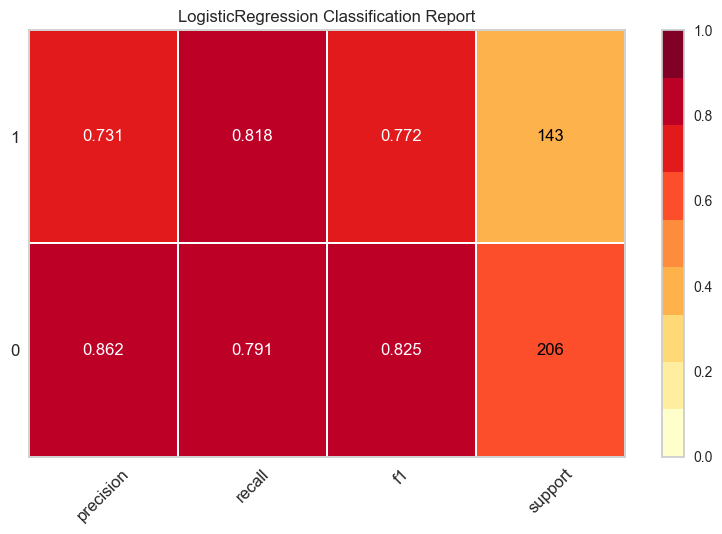

In [71]:
from pycaret.classification import *
plot_model(lr, plot = 'class_report')

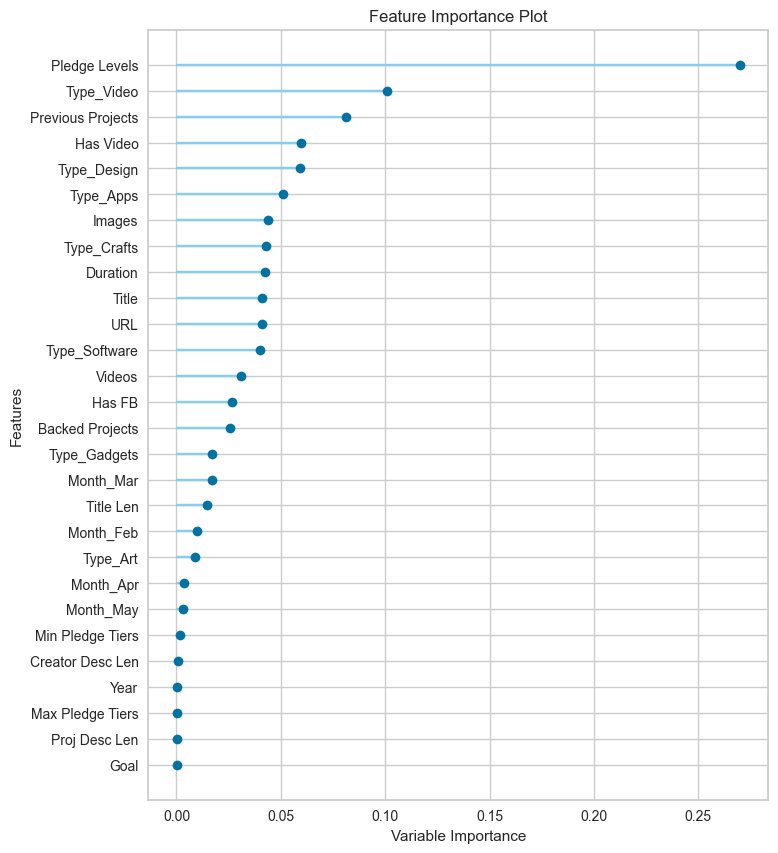

In [72]:
plot_model(lr, plot = 'feature_all')